# Importando bibliotecas

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC, SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Aquisição dos dados

In [100]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

In [101]:
car_data = pd.read_csv(url)

car_data.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


# Tratamento dos dados

In [102]:
current_year = datetime.today().year
car_data['model_age'] = current_year - car_data['model_year']
car_data['km_per_year'] = car_data['mileage_per_year'] * 1.60934

In [103]:
car_data.drop(columns=['Unnamed: 0', 'model_year', 'mileage_per_year'], inplace=True)

In [104]:
car_data.isna().sum()

price          0
sold           0
model_age      0
km_per_year    0
dtype: int64

In [105]:
car_data['sold'] = car_data['sold'].map({
    'yes': 1,
    'no': 0
})

In [106]:
car_data.head(10)

,price,sold,model_age,km_per_year
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290
5,55405.26,1,15,23594.53374
6,93415.61,1,20,16077.30660
7,65265.09,0,14,18666.73466
8,43917.53,1,23,12607.56956
9,107860.41,1,19,24000.08742


In [107]:
cols = ['price', 'model_age', 'km_per_year', 'sold']

car_data = car_data.reindex(columns=cols)

In [108]:
car_data.head(10)

,price,model_age,km_per_year,sold
0,30941.02,22,35085.22134,1
1,40557.96,24,12622.05362,1
2,89627.50,16,11440.79806,0
3,95276.14,7,43167.32682,0
4,117384.68,8,12770.11290,1
5,55405.26,15,23594.53374,1
6,93415.61,20,16077.30660,1
7,65265.09,14,18666.73466,0
8,43917.53,23,12607.56956,1
9,107860.41,19,24000.08742,1


# Separando treino e teste

In [109]:
SEED = 73
np.random.seed(SEED)

In [110]:
x = car_data[['price', 'model_age', 'km_per_year']]
y = car_data['sold']

In [111]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y)

# Testando modelos

## - LinearSVC

In [112]:
model = LinearSVC()

model.fit(train_x, train_y)

pred = model.predict(test_x)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do LinearSVC foi de {:.2f}%'.format(accuracy * 100))

A acurácia do LinearSVC foi de 60.64%


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## - DummyClassifier

In [113]:
model = DummyClassifier()

model.fit(train_x, train_y)

pred = model.predict(test_x)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do DummyClassifier Stratified foi de {:.2f}%'.format(accuracy * 100))

A acurácia do DummyClassifier Stratified foi de 58.00%


In [114]:
model = DummyClassifier(strategy='most_frequent')

model.fit(train_x, train_y)

pred = model.predict(test_x)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do DummyClassifier Most Frequent foi de {:.2f}%'.format(accuracy * 100))

A acurácia do DummyClassifier Most Frequent foi de 58.00%


## - SVC

In [115]:
scaler = StandardScaler()

scaler.fit(train_x)
train_x_pp = scaler.transform(train_x)
test_x_pp = scaler.transform(test_x)

model = SVC()
model.fit(train_x_pp, train_y)
pred = model.predict(test_x_pp)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do SVC foi de {:.2f}%'.format(accuracy * 100))

A acurácia do SVC foi de 77.04%


## - DecisionTreeClassifier

In [123]:
scaler = StandardScaler()

scaler.fit(train_x)
train_x_pp = scaler.transform(train_x)
test_x_pp = scaler.transform(test_x)

model = DecisionTreeClassifier(max_depth=3)
model.fit(train_x_pp, train_y)
pred = model.predict(test_x_pp)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do DecisionTreeClassifier foi de {:.2f}%'.format(accuracy * 100))

A acurácia do DecisionTreeClassifier foi de 78.68%


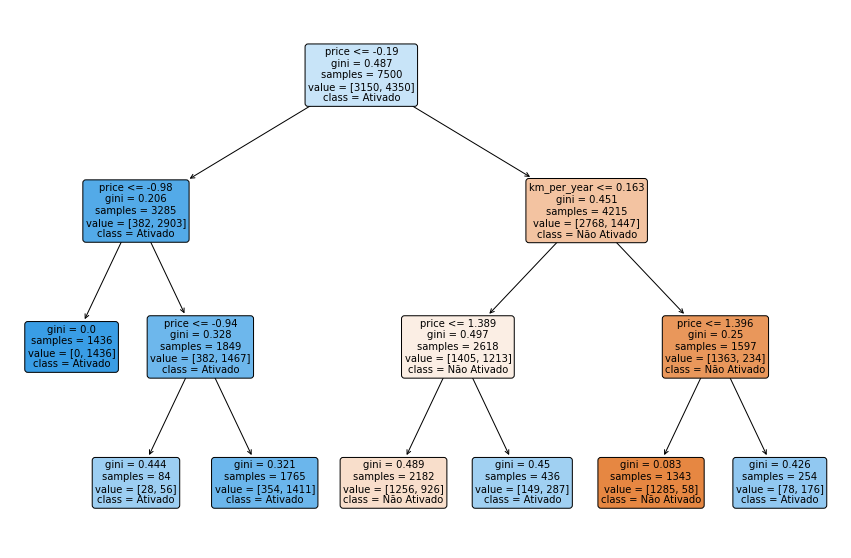

In [124]:
fig, ax = plt.subplots(figsize=(15, 10))

tree.plot_tree(
    model,
    fontsize=10,
    rounded=True,
    filled=True,
    feature_names=train_x.columns,
    class_names=['Não Ativado', 'Ativado']
);